In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, Ridge,Lasso, ElasticNetCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix, mean_squared_error,accuracy_score, f1_score,classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import math
from imblearn.over_sampling import SMOTE 
import xgboost as xgb
import imblearn.over_sampling


In [2]:
df = pd.read_csv('bank-additional-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df = df.drop(columns = 'duration')

In [6]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
num_col = df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index

<ipython-input-8-6336f6fdd0f5>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  num_col = df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-9-083563638856>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


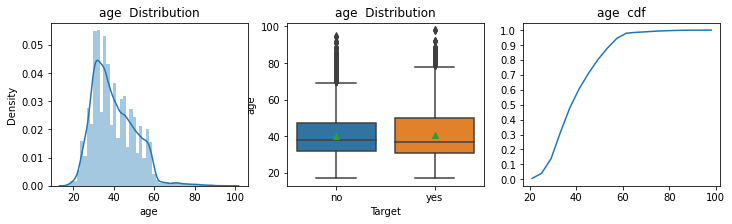

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<ipython-input-9-083563638856>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


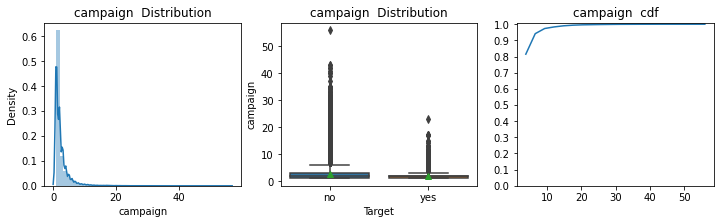

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<ipython-input-9-083563638856>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


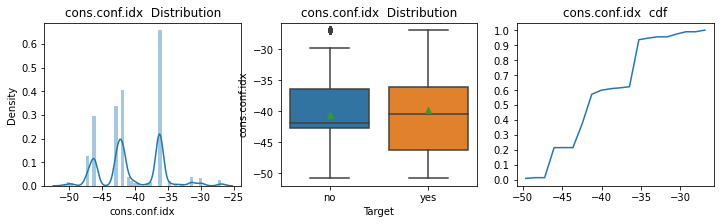

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<ipython-input-9-083563638856>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


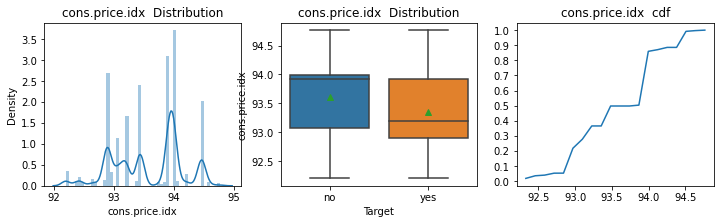

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<ipython-input-9-083563638856>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


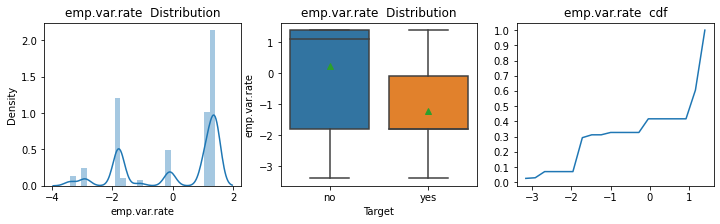

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<ipython-input-9-083563638856>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


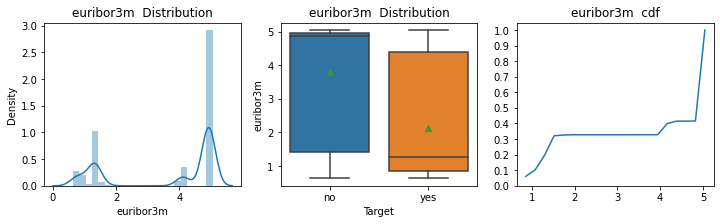

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<ipython-input-9-083563638856>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


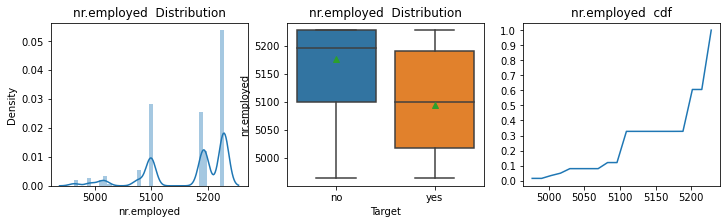

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<ipython-input-9-083563638856>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


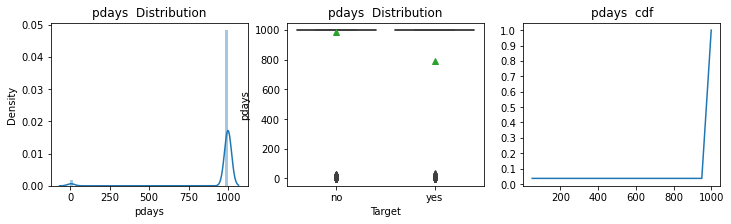

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<ipython-input-9-083563638856>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


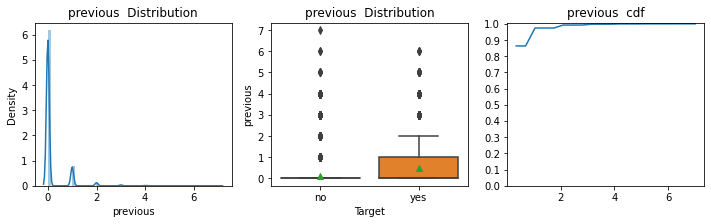

In [9]:
for col in num_col:
    plt.figure(figsize=(12,3))

    plt.subplot(1,3,1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'{col}  Distribution')

    plt.subplot(1,3,2)
    sns.boxplot(x='y', y=col, data =df, showmeans=True )
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.title(f'{col}  Distribution')

    plt.subplot(1,3,3)
    counts, bins = np.histogram(df[col], bins=20, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bins[1:], cdf/cdf[-1])
    #plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f'{col}  cdf')
    plt.show()
    print()

In [10]:
dfgrouped = df.groupby('y')

In [11]:
def plot_barh(array,incrementer, bias, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

    sns.set_style(palette_style)
    sns.set_palette(palette_color)

    plt.barh(array.index, width = array.values, height = .5)
    plt.yticks(np.arange(len(array)))
    plt.xticks( range(0, round(max(array)) +bias, incrementer ))

    for index, value in enumerate(array.values):
        plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

    #plt.show()
    return plt

In [12]:
def feature_perc(feature,groupby= 'yes'):

    count = dfgrouped.get_group(groupby)[feature].value_counts()
    total_count = df[feature].value_counts()[count.index]

    perc = (count/total_count)*100
    return perc 

In [13]:
obj_column = df.dtypes[df.dtypes == 'object'].index
obj_column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

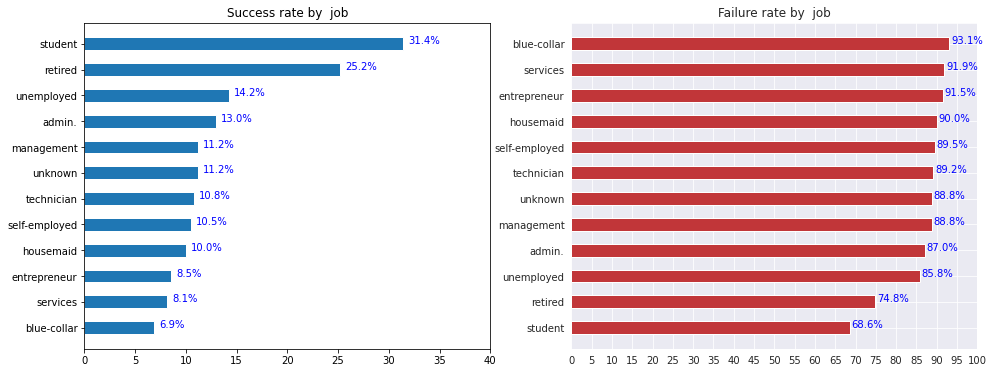

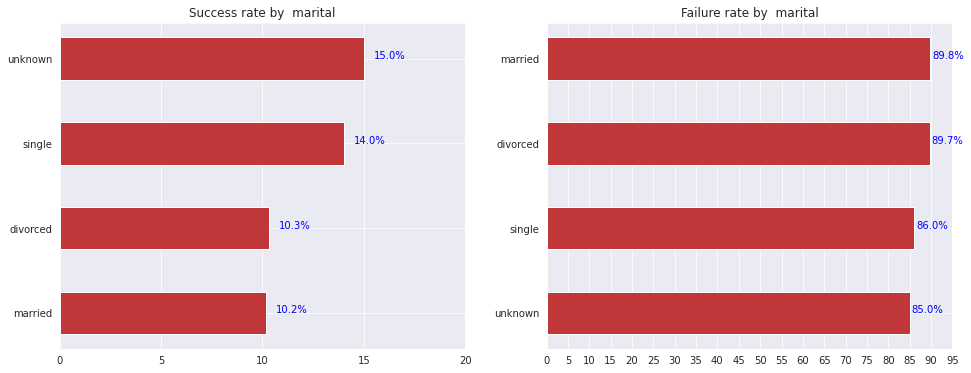

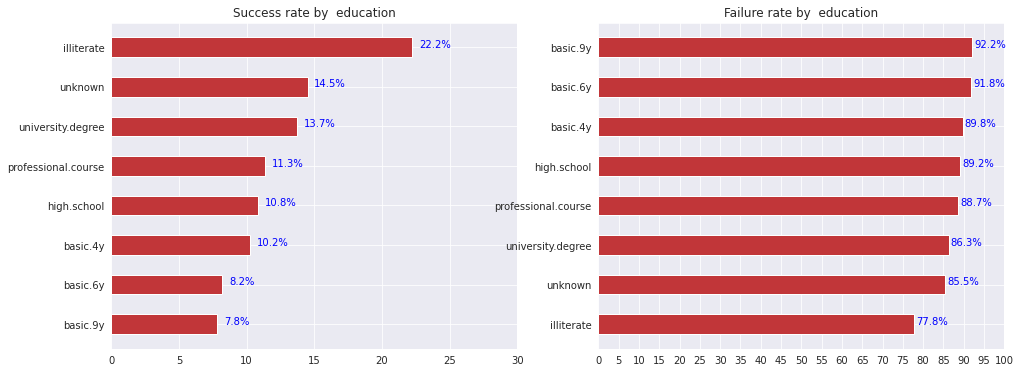

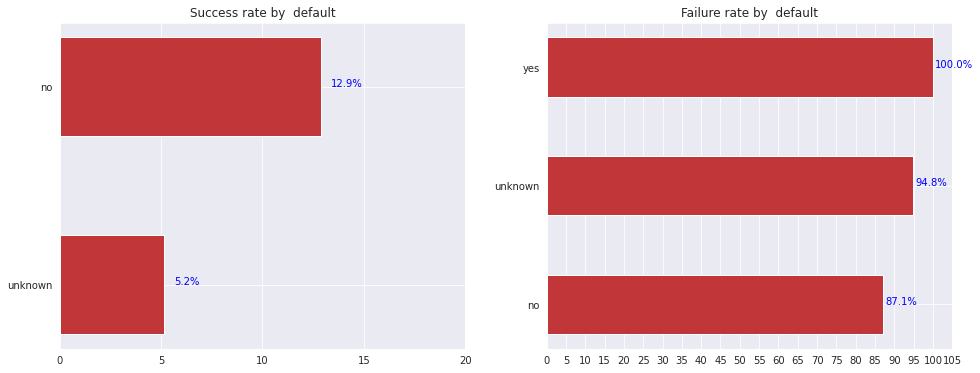

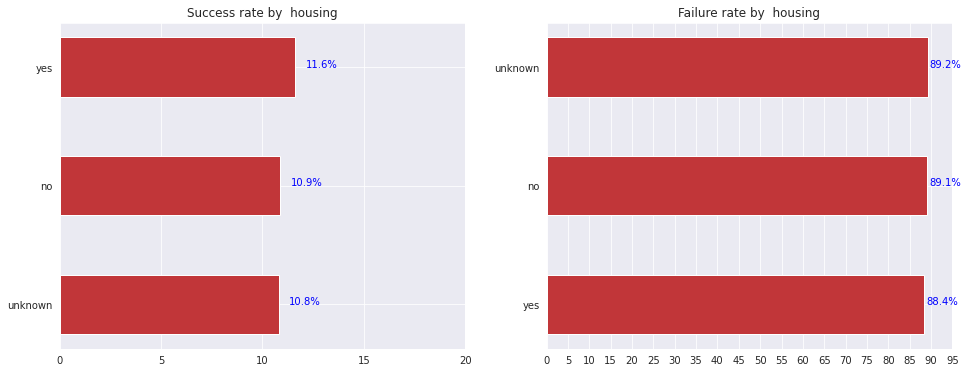

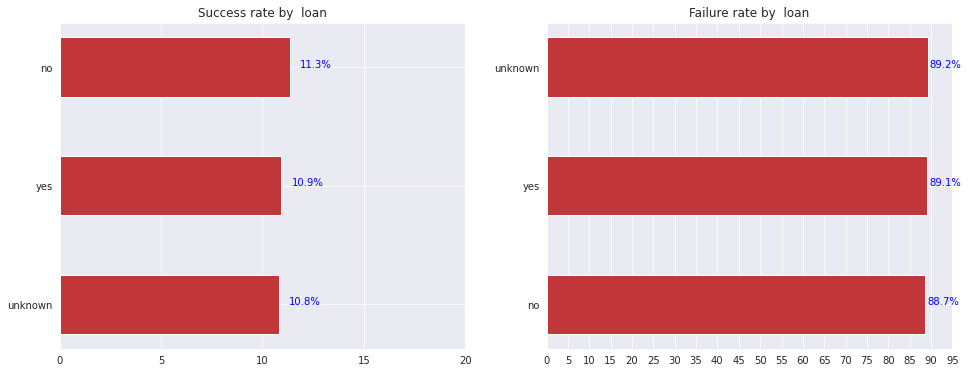

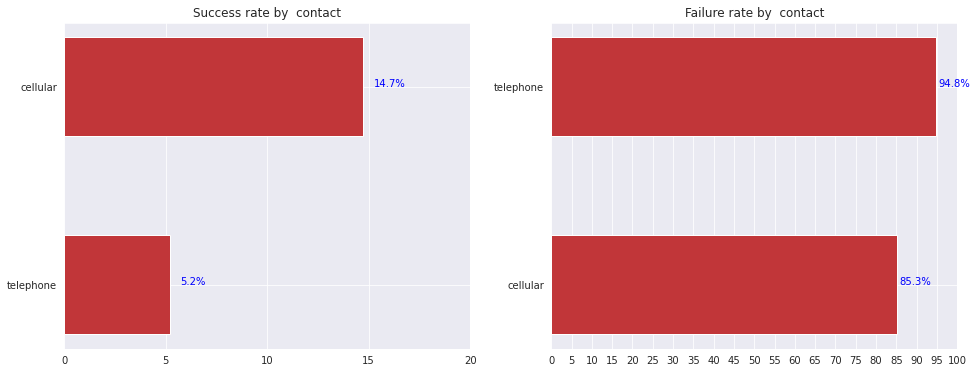

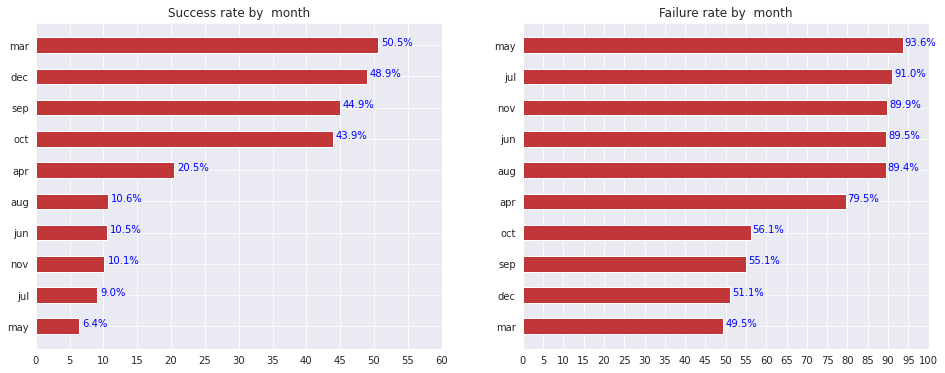

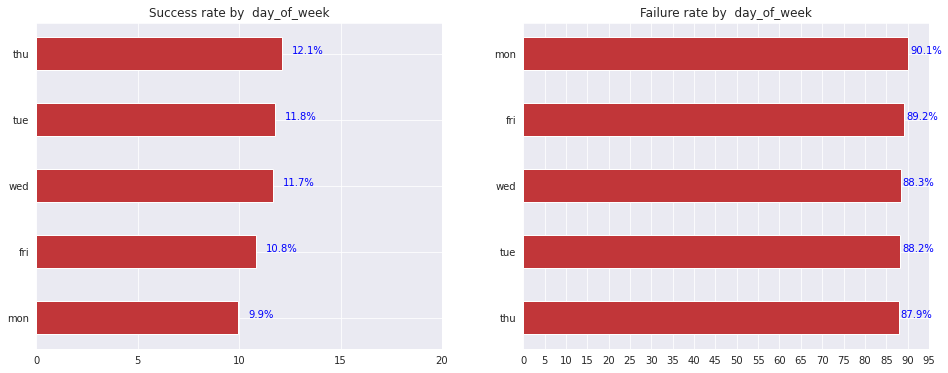

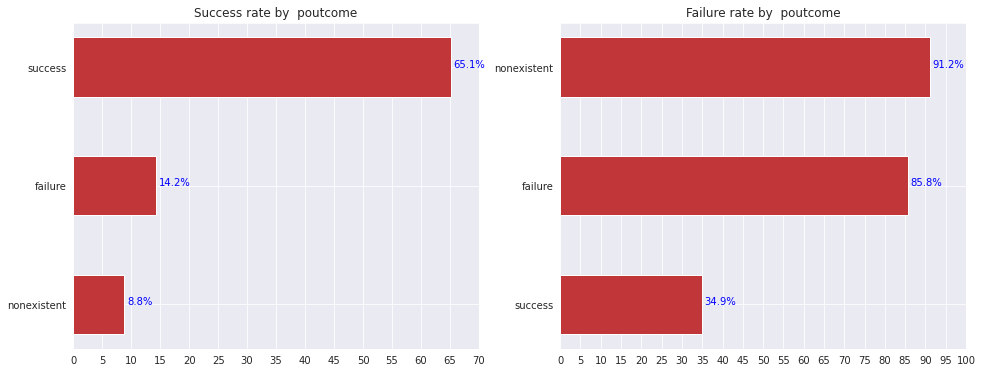

In [14]:
for column in obj_column[:-1]:

    yes_perc = feature_perc(column, groupby='yes')
    no_perc = feature_perc(column, groupby='no')

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.title(f'Success rate by  {column}')
    plot_barh(yes_perc.sort_values(),5,10)

    plt.subplot(1,2,2)
    plt.title(f'Failure rate by  {column}')
    plot_barh(no_perc.sort_values(),5,10)
    plt.show()
    print()

In [15]:
month_map = {'jan':1 , 'feb':2,'mar':3,'apr':4,'may':5,'jun':6
            ,'jul':7, 'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
week_map = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}

In [16]:
df.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [17]:
df.day_of_week = df.day_of_week.map(week_map)

In [18]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [19]:
df.month = df.month.map(month_map)

In [28]:
from sklearn import preprocessing
m = []
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
        le_name_mapping = list(zip(le.classes_, le.transform(le.classes_)))
        mapping = {column_name : le_name_mapping}
        m.append(mapping)

    else:
        pass

In [29]:
m

[{'job': [('admin.', 0),
   ('blue-collar', 1),
   ('entrepreneur', 2),
   ('housemaid', 3),
   ('management', 4),
   ('retired', 5),
   ('self-employed', 6),
   ('services', 7),
   ('student', 8),
   ('technician', 9),
   ('unemployed', 10),
   ('unknown', 11)]},
 {'marital': [('divorced', 0), ('married', 1), ('single', 2), ('unknown', 3)]},
 {'education': [('basic.4y', 0),
   ('basic.6y', 1),
   ('basic.9y', 2),
   ('high.school', 3),
   ('illiterate', 4),
   ('professional.course', 5),
   ('university.degree', 6),
   ('unknown', 7)]},
 {'default': [('no', 0), ('unknown', 1), ('yes', 2)]},
 {'housing': [('no', 0), ('unknown', 1), ('yes', 2)]},
 {'loan': [('no', 0), ('unknown', 1), ('yes', 2)]},
 {'contact': [('cellular', 0), ('telephone', 1)]},
 {'poutcome': [('failure', 0), ('nonexistent', 1), ('success', 2)]},
 {'y': [('no', 0), ('yes', 1)]}]

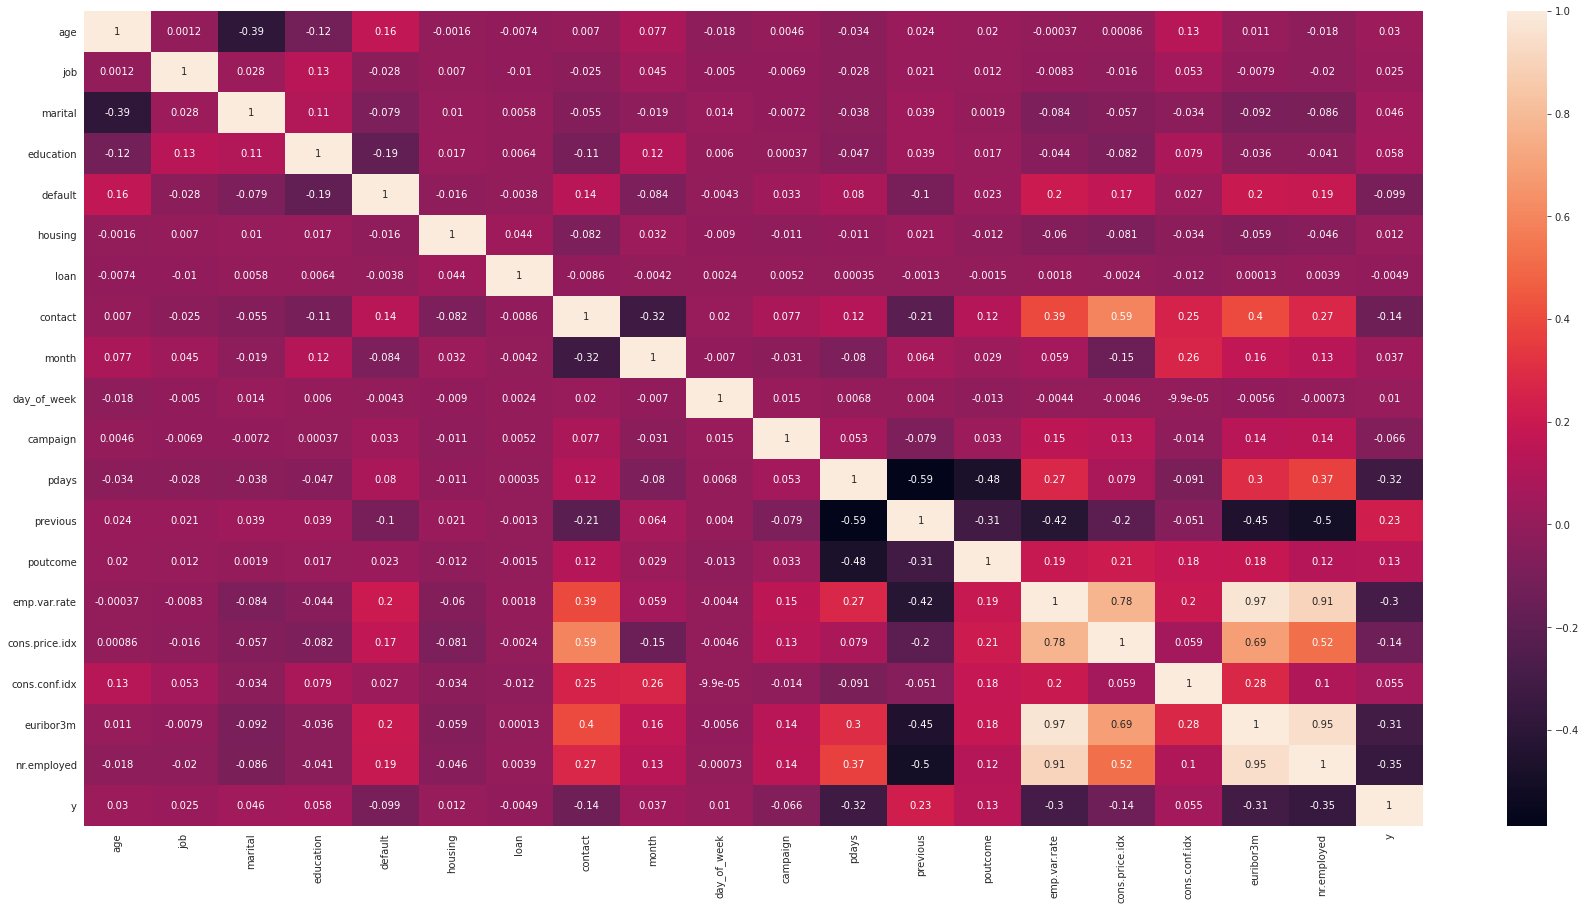

In [30]:
plt.figure(figsize=(30, 15))

sns.heatmap(df.corr(),annot=True)

plt.show()

In [31]:
df = df.drop(columns = 'euribor3m')
df = df.drop(columns = 'emp.var.rate')

In [32]:
X = df.loc[:,(df.columns!='y')]
y = df.loc[:,'y']

In [33]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [34]:
np.mean(y)

0.11265417111780131

0    0.887346
1    0.112654
Name: y, dtype: float64


<AxesSubplot:>

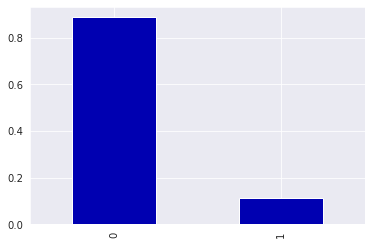

In [35]:
target_y = y.value_counts(normalize=True)
print(target_y)
target_y.plot(kind='bar')

In [36]:
X,X_te,y,y_te = train_test_split(X, y, test_size=0.2,stratify = y)
X_tr,X_val,y_tr,y_val = train_test_split(X,y,test_size =.25,stratify = y)

In [37]:
import imblearn.over_sampling
from sklearn.metrics import roc_auc_score
n_pos = np.sum(y_tr == 1)
n_neg = np.sum(y_tr == 0)
ratio = {1 : n_pos * 7, 0 : n_neg} 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio) 
X_tr_rs, y_tr_rs = ROS.fit_resample(X_tr, y_tr)
lr = LogisticRegression(solver='liblinear') 
lr.fit(X_tr, y_tr)

print('Simple Logistic Regression on train; Test AUC: %.3f' % 
      (roc_auc_score(y_tr, lr.predict_proba(X_tr)[:,1])))
print('Simple Logistic Regression on val; Test AUC: %.3f' % 
      (roc_auc_score(y_val, lr.predict_proba(X_val)[:,1])))

lr_os = LogisticRegression(solver='liblinear',C=1000) 
lr_os.fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data on train; Test AUC: %.3f' % \
      (roc_auc_score(y_tr_rs, lr_os.predict_proba(X_tr_rs)[:,1])))
print('Logistic Regression on Oversampled Train Data on val; Test AUC: %.3f' % \
      (roc_auc_score(y_val, lr_os.predict_proba(X_val)[:,1])))

smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr, y_tr)

lr_smote = LogisticRegression(solver='liblinear',C=1000) 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data on train; Test AUC: %.3f' % \
      (roc_auc_score(y_tr_smote, lr_smote.predict_proba(X_tr_smote)[:,1])))
print('Logistic Regression on SMOTE Train Data on val; Test AUC: %.3f' % \
      (roc_auc_score(y_val, lr_smote.predict_proba(X_val)[:,1])))

Simple Logistic Regression on train; Test AUC: 0.775
Simple Logistic Regression on val; Test AUC: 0.769
Logistic Regression on Oversampled Train Data on train; Test AUC: 0.779
Logistic Regression on Oversampled Train Data on val; Test AUC: 0.771
Logistic Regression on SMOTE Train Data on train; Test AUC: 0.847
Logistic Regression on SMOTE Train Data on val; Test AUC: 0.745


In [38]:
scaler = StandardScaler()
X_tr_scale = scaler.fit_transform(X_tr)
X_tr_rs_scale = scaler.fit_transform(X_tr_rs)
X_tr_smote_scale = scaler.fit_transform(X_tr_smote)
X_te_scale = scaler.transform(X_te)


In [39]:
knn=KNeighborsClassifier(n_neighbors=200,weights = 'distance')
knn.fit(X_tr_scale ,y_tr)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_scale)[:,1]
print('KNN on simple scaled dataset on train; Test AUC distance : %.3f' % \
(roc_auc_score(y_tr,train_knn)))
print('KNN on simple scaled dataset on val distance ; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors=1000,weights = 'distance')
knn.fit(X_tr_scale ,y_tr)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_scale)[:,1]
print('KNN on simple scaled dataset on train; Test AUC distance 1000: %.3f' % \
(roc_auc_score(y_tr,train_knn)))
print('KNN on simple scaled dataset on val distance 1000; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors=200,weights = 'uniform')
knn.fit(X_tr_scale ,y_tr)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_scale)[:,1]
print('KNN on simple scaled dataset on train; Test AUC uniform : %.3f' % \
(roc_auc_score(y_tr,train_knn)))
print('KNN on simple scaled dataset on val uniform ; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors=1000,weights = 'uniform')
knn.fit(X_tr_scale ,y_tr)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_scale)[:,1]
print('KNN on simple scaled dataset on train; Test AUC uniform 1000: %.3f' % \
(roc_auc_score(y_tr,train_knn)))
print('KNN on simple scaled dataset on val uniform 1000; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors=203,weights = 'distance')
knn.fit(X_tr_rs ,y_tr_rs)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_rs)[:,1]
print('KNN on RS oversampled dataset on train; Test AUC distance : %.3f' % \
(roc_auc_score(y_tr_rs,train_knn)))
print('KNN on RS Oversampled dataset on val distance ; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors=1000,weights = 'distance')
knn.fit(X_tr_rs ,y_tr_rs)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_rs)[:,1]
print('KNN on RS Oversampled dataset on train; Test AUC distance 1000: %.3f' % \
(roc_auc_score(y_tr_rs,train_knn)))
print('KNN on RS Oversampled dataset on val distance 1000; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors=200,weights = 'uniform')
knn.fit(X_tr_rs ,y_tr_rs)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_rs)[:,1]
print('KNN on RS oversampled dataset on train; Test AUC uniform : %.3f' % \
(roc_auc_score(y_tr_rs,train_knn)))
print('KNN on RS Oversampled dataset on val uniform ; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))


knn=KNeighborsClassifier(n_neighbors=1000,weights = 'uniform')
knn.fit(X_tr_rs ,y_tr_rs)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_rs)[:,1]
print('KNN on RS oversampled dataset on train; Test AUC uniform 1000: %.3f' % \
(roc_auc_score(y_tr_rs,train_knn)))
print('KNN on RS Oversampled dataset on val uniform 1000; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors = 200 ,weights = 'distance')
knn.fit(X_tr_smote,y_tr_smote)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_smote)[:,1]
print('KNN on SMOTE dataset on train; Test AUC distance: %.3f' % \
(roc_auc_score(y_tr_smote,train_knn)))
print('KNN on SMOTE dataset on val distance; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors=1000,weights = 'distance')
knn.fit(X_tr_smote,y_tr_smote)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_smote)[:,1]
print('KNN on SMOTE dataset on train; Test AUC distance 1000: %.3f' % \
(roc_auc_score(y_tr_smote,train_knn)))
print('KNN on SMOTE dataset on val distance 1000; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors = 200 ,weights = 'uniform')
knn.fit(X_tr_smote,y_tr_smote)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_smote)[:,1]
print('KNN on SMOTE dataset on train; Test AUC uniform : %.3f' % \
(roc_auc_score(y_tr_smote,train_knn)))
print('KNN on SMOTE dataset on val uniform ; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

knn=KNeighborsClassifier(n_neighbors=1000,weights = 'uniform')
knn.fit(X_tr_smote,y_tr_smote)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_smote)[:,1]
print('KNN on SMOTE dataset on train; Test AUC uniform 1000: %.3f' % \
(roc_auc_score(y_tr_smote,train_knn)))
print('KNN on SMOTE dataset on val uniform 1000; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

KNN on simple scaled dataset on train; Test AUC distance : 1.000
KNN on simple scaled dataset on val distance ; Test AUC: 0.499
KNN on simple scaled dataset on train; Test AUC distance 1000: 1.000
KNN on simple scaled dataset on val distance 1000; Test AUC: 0.570
KNN on simple scaled dataset on train; Test AUC uniform : 0.798
KNN on simple scaled dataset on val uniform ; Test AUC: 0.479
KNN on simple scaled dataset on train; Test AUC uniform 1000: 0.788
KNN on simple scaled dataset on val uniform 1000; Test AUC: 0.568
KNN on RS oversampled dataset on train; Test AUC distance : 1.000
KNN on RS Oversampled dataset on val distance ; Test AUC: 0.756
KNN on RS Oversampled dataset on train; Test AUC distance 1000: 1.000
KNN on RS Oversampled dataset on val distance 1000; Test AUC: 0.759
KNN on RS oversampled dataset on train; Test AUC uniform : 0.807
KNN on RS Oversampled dataset on val uniform ; Test AUC: 0.775
KNN on RS oversampled dataset on train; Test AUC uniform 1000: 0.790
KNN on RS O

In [40]:
dt=DecisionTreeClassifier()
dt.fit(X_tr,y_tr)
pred_dt=dt.predict_proba(X_val)[:,1]
train_dt = dt.predict_proba(X_tr)[:,1]
print('DecisionTree on data on train; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_dt)))
print('DecisionTree on data on val; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_dt)))

dt=DecisionTreeClassifier(max_depth=6)
dt.fit(X_tr,y_tr)
pred_dt=dt.predict_proba(X_val)[:,1]
train_dt = dt.predict_proba(X_tr)[:,1]
print('DecisionTree on data on train tuned; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_dt)))
print('DecisionTree on data on val tuned; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_dt)))

DecisionTree on data on train; Test AUC: 1.000
DecisionTree on data on val; Test AUC: 0.636
DecisionTree on data on train tuned; Test AUC: 0.795
DecisionTree on data on val tuned; Test AUC: 0.767


In [41]:
rf=RandomForestClassifier()
rf.fit(X_tr,y_tr)
pred_rf=rf.predict_proba(X_val)[:,1]
train_rf = rf.predict_proba(X_tr)[:,1]
print('RandomForest on data on train; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_rf)))
print('RandomForest on data on val; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_rf)))

rf=RandomForestClassifier(n_estimators= 1000,max_depth= 5,min_samples_leaf= 2)
rf.fit(X_tr,y_tr)
pred_rf=rf.predict_proba(X_val)[:,1]
train_rf = rf.predict_proba(X_tr)[:,1]
print('RandomForest on data on train tuned ; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_rf)))
print('RandomForest on data on val tuned ; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_rf)))

RandomForest on data on train; Test AUC: 1.000
RandomForest on data on val; Test AUC: 0.762
RandomForest on data on train tuned ; Test AUC: 0.799
RandomForest on data on val tuned ; Test AUC: 0.784


In [42]:
from sklearn.model_selection import StratifiedKFold
model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
depth = [1,2,3,4,5]
param_grid = dict(learning_rate=learning_rate,max_depth = depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_tr,y_tr)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.797698 using {'learning_rate': 0.1, 'max_depth': 4}


In [47]:
xgb_clf= xgb.XGBClassifier()
xgb_clf.fit(X_tr,y_tr)
pred_xgb=xgb_clf.predict_proba(X_val)[:,1]
train_xgb = xgb_clf.predict_proba(X_tr)[:,1]
print('XGBoost on data on train; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_xgb)))
print('XGBoost on data on val; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_xgb)))

xgb_clf= xgb.XGBClassifier(max_depth = 3,learning_rate = 0.1)
xgb_clf.fit(X_tr,y_tr)
pred_xgb=xgb_clf.predict_proba(X_val)[:,1]
train_xgb = xgb_clf.predict_proba(X_tr)[:,1]
print('XGBoost on data on train depth 4; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_xgb)))
print('XGBoost on data on val depth 4; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_xgb)))

xgb_clf= xgb.XGBClassifier(max_depth = 2,learning_rate = 0.2)
xgb_clf.fit(X_tr,y_tr)
pred_xgb=xgb_clf.predict_proba(X_val)[:,1]
train_xgb = xgb_clf.predict_proba(X_tr)[:,1]
print('XGBoost on data on train depth 2; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_xgb)))
print('XGBoost on data on val depth 2; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_xgb)))

xgb_clf= xgb.XGBClassifier(max_depth = 3,learning_rate = 0.2)
xgb_clf.fit(X_tr,y_tr)
pred_xgb=xgb_clf.predict_proba(X_val)[:,1]
train_xgb = xgb_clf.predict_proba(X_tr)[:,1]
print('XGBoost on data on train depth 3 ; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_xgb)))
print('XGBoost on data on val depth 3; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_xgb)))

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:19:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost on data on train; Test AUC: 0.914
XGBoost on data on val; Test AUC: 0.778
[23:19:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost on data on train depth 4; Test AUC: 0.809
XGBoost on data on val depth 4; Test AUC: 0.792
[23:19:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost on data on train depth 2; Test AUC: 0.804
XGBoost on data on val depth 2; Test AUC: 0.790
[23:19:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost on data on train depth 3 ; Test AUC: 0.819
XGBoost on data on val depth 3; Test AUC: 0.795


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [44]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_tr,y_tr)
pred_nb=nb.predict_proba(X_val)[:,1]
train_nb= nb.predict_proba(X_tr)[:,1]
print('Naive Bayes on data on train; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_nb)))
print('Naive Bayes on data on val; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_nb)))



Naive Bayes on data on train; Test AUC: 0.681
Naive Bayes on data on val; Test AUC: 0.672


In [48]:
### Best among models 
lr_os = LogisticRegression(solver='liblinear',C=1000) 
lr_os.fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data on train; Test AUC: %.3f' % \
      (roc_auc_score(y_tr_rs, lr_os.predict_proba(X_tr_rs)[:,1])))
print('Logistic Regression on Oversampled Train Data on val; Test AUC: %.3f' % \
      (roc_auc_score(y_val, lr_os.predict_proba(X_val)[:,1])))

knn=KNeighborsClassifier(n_neighbors=1000,weights = 'uniform')
knn.fit(X_tr_smote,y_tr_smote)
pred_knn=knn.predict_proba(X_val)[:,1]
train_knn = knn.predict_proba(X_tr_smote)[:,1]
print('KNN on SMOTE dataset on train; Test AUC uniform 1000: %.3f' % \
(roc_auc_score(y_tr_smote,train_knn)))
print('KNN on SMOTE dataset on val uniform 1000; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_knn)))

dt=DecisionTreeClassifier(max_depth=6)
dt.fit(X_tr,y_tr)
pred_dt=dt.predict_proba(X_val)[:,1]
train_dt = dt.predict_proba(X_tr)[:,1]
print('DecisionTree on data on train tuned; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_dt)))
print('DecisionTree on data on val tuned; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_dt)))

rf=RandomForestClassifier(n_estimators= 1000,max_depth= 5,min_samples_leaf= 2)
rf.fit(X_tr,y_tr)
pred_rf=rf.predict_proba(X_val)[:,1]
train_rf = rf.predict_proba(X_tr)[:,1]
print('RandomForest on data on train tuned ; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_rf)))
print('RandomForest on data on val tuned ; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_rf)))

xgb_clf= xgb.XGBClassifier(max_depth = 3,learning_rate = 0.1)
xgb_clf.fit(X_tr,y_tr)
pred_xgb=xgb_clf.predict_proba(X_val)[:,1]
train_xgb = xgb_clf.predict_proba(X_tr)[:,1]
print('XGBoost on data on train depth 3; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_xgb)))
print('XGBoost on data on val depth 3; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_xgb)))

nb = BernoulliNB()
nb.fit(X_tr,y_tr)
pred_nb=nb.predict_proba(X_val)[:,1]
train_nb= nb.predict_proba(X_tr)[:,1]
print('Naive Bayes on data on train; Test AUC: %.3f' % \
(roc_auc_score(y_tr,train_nb)))
print('Naive Bayes on data on val; Test AUC: %.3f' % \
(roc_auc_score(y_val,pred_nb)))

Logistic Regression on Oversampled Train Data on train; Test AUC: 0.779
Logistic Regression on Oversampled Train Data on val; Test AUC: 0.771
KNN on SMOTE dataset on train; Test AUC uniform 1000: 0.798
KNN on SMOTE dataset on val uniform 1000; Test AUC: 0.780
DecisionTree on data on train tuned; Test AUC: 0.795
DecisionTree on data on val tuned; Test AUC: 0.766
RandomForest on data on train tuned ; Test AUC: 0.798
RandomForest on data on val tuned ; Test AUC: 0.784
[23:20:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost on data on train depth 3; Test AUC: 0.809
XGBoost on data on val depth 3; Test AUC: 0.792
Naive Bayes on data on train; Test AUC: 0.681
Naive Bayes on data on val; Test AUC: 0.672


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ROC AUC score for Logistic Regression =  0.7709702550827869
ROC AUC score for KNN =  0.7795373602528421
ROC AUC score for Decision Tree =  0.7664935551205246
ROC AUC score for Random Forest =  0.7839620972687391
ROC AUC score for XGboost/Gradient Boosting =  0.7919172189725932
ROC AUC score for Naive Bayes =  0.6718804542667106


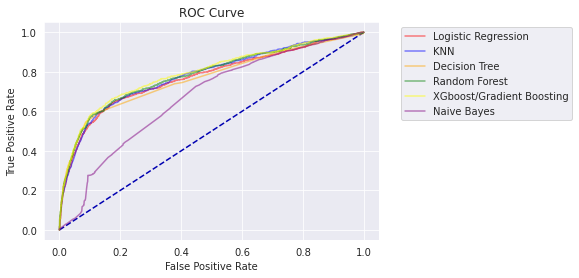

In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, lr_os.predict_proba(X_val)[:,1])
plt.plot(fpr,tpr,label = 'Logistic Regression',color = 'red',alpha =.5)
x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("ROC AUC score for Logistic Regression = ", roc_auc_score(y_val, lr_os.predict_proba(X_val)[:,1]))
plt.legend(bbox_to_anchor= [1.05,1],loc = 'upper left')

fpr, tpr, thresholds = roc_curve(y_val, knn.predict_proba(X_val)[:,1])
plt.plot(fpr,tpr,label = 'KNN',color = 'blue',alpha = .5)
print("ROC AUC score for KNN = ", roc_auc_score(y_val, knn.predict_proba(X_val)[:,1]))
plt.legend(bbox_to_anchor= [1.05,1],loc = 'upper left')

fpr, tpr, thresholds = roc_curve(y_val, dt.predict_proba(X_val)[:,1])
plt.plot(fpr,tpr,label = 'Decision Tree',color = 'orange',alpha = .5)
print("ROC AUC score for Decision Tree = ", roc_auc_score(y_val, dt.predict_proba(X_val)[:,1]))
plt.legend(bbox_to_anchor= [1.05,1],loc = 'upper left')

fpr, tpr, thresholds = roc_curve(y_val, rf.predict_proba(X_val)[:,1])
plt.plot(fpr,tpr,label = 'Random Forest',color = 'green',alpha = .5)
print("ROC AUC score for Random Forest = ", roc_auc_score(y_val, rf.predict_proba(X_val)[:,1]))
plt.legend(bbox_to_anchor= [1.05,1],loc = 'upper left')

fpr, tpr, thresholds = roc_curve(y_val, xgb_clf.predict_proba(X_val)[:,1])
plt.plot(fpr,tpr,label = 'XGboost/Gradient Boosting',color = 'yellow',alpha = .5)
print("ROC AUC score for XGboost/Gradient Boosting = ", roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1]))
plt.legend(bbox_to_anchor= [1.05,1],loc = 'upper left')

fpr, tpr, thresholds = roc_curve(y_val, nb.predict_proba(X_val)[:,1])
plt.plot(fpr,tpr,label = 'Naive Bayes',color = 'purple',alpha = .5)
print("ROC AUC score for Naive Bayes = ", roc_auc_score(y_val, nb.predict_proba(X_val)[:,1]))
plt.legend(bbox_to_anchor= [1.05,1],loc = 'upper left')

In [51]:
### Choosing Xgboost 
xgb_clf= xgb.XGBClassifier(max_depth = 3,learning_rate = 0.1)
xgb_clf.fit(X_tr,y_tr)
test_xgb=xgb_clf.predict_proba(X_te)[:,1]

print('XGBoost on data on test depth 3 learning rate 0.1; Test AUC: %.3f' % \
(roc_auc_score(y_te,test_xgb)))






[23:21:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost on data on test depth 3 learning rate 0.1; Test AUC: 0.802


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

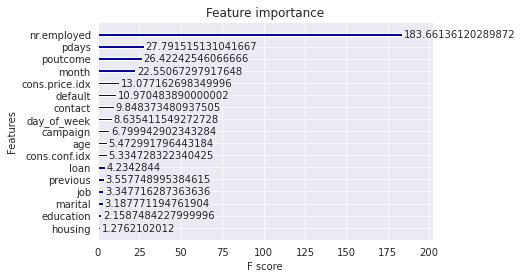

In [70]:

xgb.plot_importance(xgb_clf, importance_type='gain',)

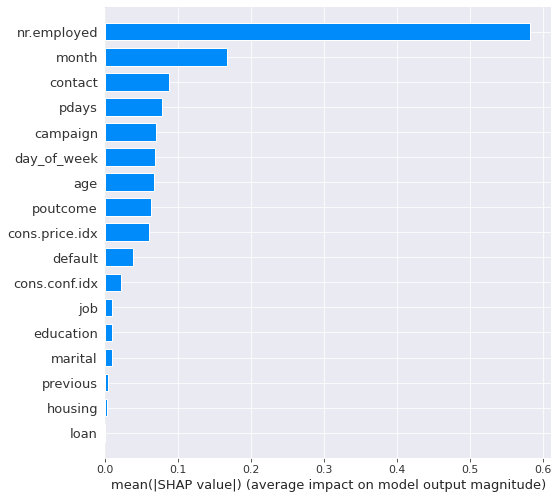

In [71]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_te)
shap.summary_plot(shap_values,X_te,plot_type='bar')

In [53]:
actual = list(y_te)

In [54]:
pred = list(test_xgb)

In [55]:
ranking = zip(actual,pred)

In [56]:
ranking = pd.DataFrame(ranking,columns = ['Actual','Predict'])

In [57]:
ranking

,Actual,Predict
0,0,0.055733
1,0,0.062504
2,0,0.393273
3,0,0.095046
4,0,0.051913
...,...,...
8233,0,0.070700
8234,0,0.054236
8235,0,0.063269
8236,0,0.099416


In [58]:
ranking.sort_values("Predict",axis=0,ascending = False,inplace=True)

In [60]:
ranking.head(20)

,Actual,Predict
1405,1,0.911900
6262,1,0.909961
1255,1,0.909126
743,0,0.899270
3298,1,0.891696
6862,0,0.891157
4636,1,0.879987
5597,1,0.879507
353,1,0.878762
4736,1,0.874104


In [69]:
ranking.head(10)

,Actual,Predict
1405,1,0.911900
6262,1,0.909961
1255,1,0.909126
743,0,0.899270
3298,1,0.891696
6862,0,0.891157
4636,1,0.879987
5597,1,0.879507
353,1,0.878762
4736,1,0.874104


In [62]:
important_features = df.loc[:,['nr.employed','contact','cons.price.idx','pdays','age','y']]

Text(0.5, 1.0, 'number of employees  Distribution')

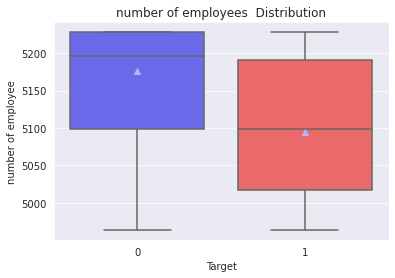

In [74]:
sns.boxplot(x='y', y='nr.employed', data =important_features, showmeans=True,palette='seismic' )
plt.xlabel('Target')
plt.ylabel('number of employee')
plt.title('number of employees  Distribution')

In [25]:
obj_column = important_features.dtypes[important_features.dtypes == 'object'].index
obj_column

Index(['contact', 'y'], dtype='object')

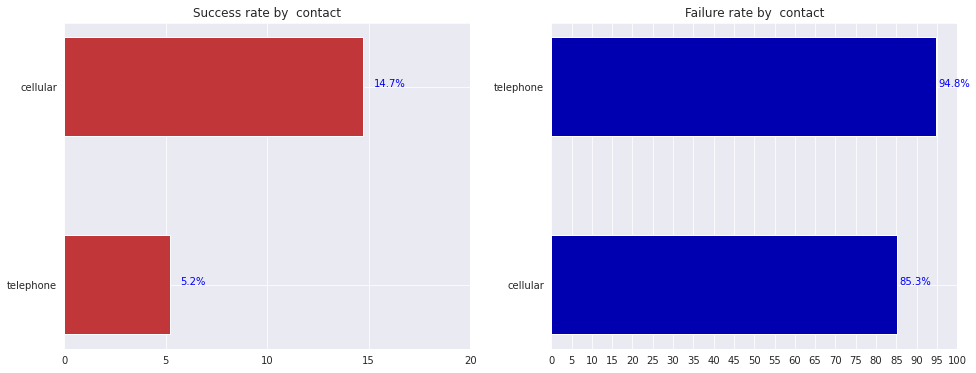

In [26]:
for column in obj_column[:-1]:

    yes_perc = feature_perc(column, groupby='yes')
    no_perc = feature_perc(column, groupby='no')

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.title(f'Success rate by  {column}')
    plot_barh(yes_perc.sort_values(),5,10,palette_color='seismic')

    plt.subplot(1,2,2)
    plt.title(f'Failure rate by  {column}')
    plot_barh(no_perc.sort_values(),5,10,palette_color='seismic')
    plt.show()
    print()

<AxesSubplot:>

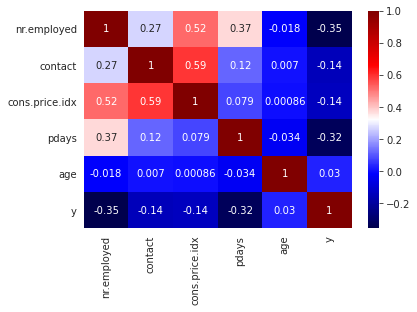

In [63]:
sns.heatmap(important_features.corr(),annot=True,cmap='seismic')